## Enquête : les étudiants et la ville

Nous considérons une partie des données issues de l'enquête "Les étudiants et la ville" effectuée en 2001 par des étudiants de sociologie à l'Université de Tours. Cet exemple est décrit dans : Crucianu M., Asselin de Beauville J-P., Boné
R., Méthodes factorielles pour l'analyse des données, Hermès-Lavoisier 2004.

__L'analyse porte sur cinq questions en rapport avec le logement étudiant. L'ensemble des individus statistiques est ici un échantillon de 383 étudiants.__



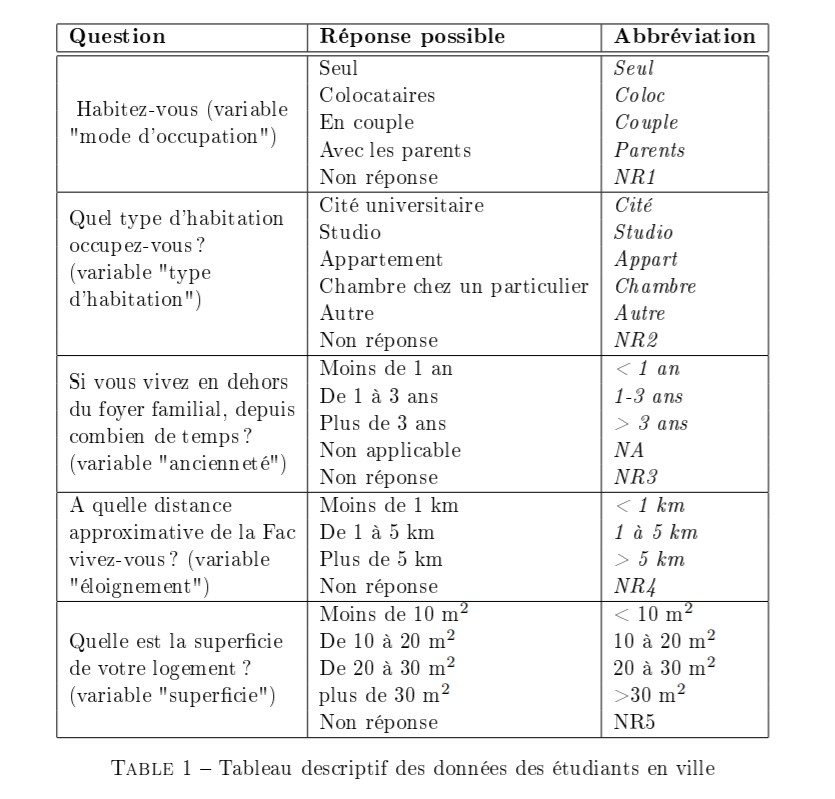

les modalités "Parents" et "NR1" ont été regroupées pour la variable
mode de logement, de même que "NA" et "NR3" pour la variable ancienneté et ">5km" et "NR4" pour la variable éloignement.

* **Réaliser une analyse des correspondances multiples produire les statistiques et les graphiques nécéssaire à l'analyse.**

* **Utiliser les graphiques et les statistiques de la fonction MCA pour interpréter les résultats.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Installation du package fanalysis
!pip install fanalysis==0.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 3.4 MB/s 


In [ ]:
import pandas as pd
import numpy as np
from fanalysis.mca import MCA
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_table("/content/drive/MyDrive/MT15/TP4_ACM/data/ex_acm.txt", header=0, index_col=0)
df

,Mode,Type,Ancien,Eloign,Superf
1,NR1,Autre,NR3,plus_5km_NR,plus_30m
2,NR1,Autre,NR3,de_1_5km,NR5
3,NR1,Autre,NR3,plus_5km_NR,NR5
4,NR1,Autre,NR3,plus_5km_NR,NR5
5,NR1,Autre,NR3,plus_5km_NR,NR5
...,...,...,...,...,...
379,Seul,Appart,NR3,plus_5km_NR,de_10_20m
380,Couple,Autre,de_1_3ans,de_1_5km,plus_30m
381,Seul,NR2,plus_3ans,plus_5km_NR,moins_10m
382,Coloc,NR2,moins_1an,de_1_5km,plus_30m


In [ ]:
for variable in df.columns:
    print(df[variable].unique())

['NR1' 'Seul' 'Coloc' 'Couple']
['Autre' 'NR2' 'Studio' 'Cite' 'Chamb' 'Appart']
['NR3' 'moins_1an' 'de_1_3ans' 'plus_3ans']
['plus_5km_NR' 'de_1_5km' 'moins_1km']
['plus_30m' 'NR5' 'de_10_20m' 'moins_10m' 'de_20_30m']


In [ ]:
df.describe()

,Mode,Type,Ancien,Eloign,Superf
count,383,383,383,383,383
unique,4,6,4,3,5
top,Seul,Appart,plus_3ans,de_1_5km,plus_30m
freq,185,116,110,191,150


In [ ]:
# On convertit les données en format matriciel (numpy array)
X = df.values
X

array([['NR1', 'Autre', 'NR3', 'plus_5km_NR', 'plus_30m'],
       ['NR1', 'Autre', 'NR3', 'de_1_5km', 'NR5'],
       ['NR1', 'Autre', 'NR3', 'plus_5km_NR', 'NR5'],
       ...,
       ['Seul', 'NR2', 'plus_3ans', 'plus_5km_NR', 'moins_10m'],
       ['Coloc', 'NR2', 'moins_1an', 'de_1_5km', 'plus_30m'],
       ['NR1', 'Autre', 'de_1_3ans', 'plus_5km_NR', 'NR5']], dtype=object)

In [ ]:
# On crée une instance de la classe MCA, en lui passant ici des labels pour les lignes et les colonnes
# Par défaut, on effectue une ACM en retenant toutes les composantes
# Pour retenir un nombre prédéfini (ex. n=2), il suffit de rajouter l'argument n_components=2
ACM = MCA(row_labels=df.index.values, var_labels=df.columns.values)

In [ ]:
# On estime le modèle en appliquant la méthode fit de la classe MCA sur le jeu de données.
ACM.fit(X)

MCA(row_labels=array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109,...
       313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325,
       326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338,
       339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351,
       352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364,
       365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377,
       378, 37

In [ ]:
# Affichage des valeurs propres
valeurs_propres=ACM.eig_[0]
print("Les valeurs propres sont : ", valeurs_propres)
print("sum valeurs propres sont :",sum(valeurs_propres))

Les valeurs propres sont :  [0.72152789 0.40328861 0.32884429 0.25190452 0.23609437 0.2104957
 0.19849951 0.18648254 0.17080041 0.16676493 0.12398298 0.11042419
 0.10424943 0.07469172 0.05531922 0.03845138 0.01817831]
sum valeurs propres sont : 3.4000000000000017


In [ ]:
# Pourcentage de l'inertie exprimée par chaque axe
print("Le poucentage d'inertie expérimée par chaque axe : ", ACM.eig_[1])

Le poucentage d'inertie expérimée par chaque axe :  [21.22140855 11.86142957  9.67189078  7.40895658  6.94395204  6.19104988
  5.83822102  5.48478067  5.02354146  4.90485078  3.64655834  3.2477702
  3.06615976  2.19681516  1.62703586  1.130923    0.53465632]


In [ ]:
# Pourcentage cumulé de l'inertie totale
print("Les poucentages d'inertie cumulée : ", ACM.eig_[2])

Les poucentages d'inertie cumulée :  [ 21.22140855  33.08283813  42.75472891  50.16368549  57.10763754
  63.29868742  69.13690844  74.62168912  79.64523057  84.55008135
  88.1966397   91.44440989  94.51056965  96.70738482  98.33442068
  99.46534368 100.        ]


In [ ]:
# Théoriquement
print("Le nombre maximal de dimensions est : K - p = ", 4+6+4+3+5-5)
print("L'inertie total est : K/p - 1 = ", (4+6+4+3+5)/5-1)

Le nombre maximal de dimensions est : K - p =  17
L'inertie total est : K/p - 1 =  3.4000000000000004


In [ ]:
# Vérification avec les résultats obtenus
print("Le nombre maximal de dimensions obtenu = ", valeurs_propres.shape)
print("L'inertie totale obtenue = ",valeurs_propres.sum())

Le nombre maximal de dimensions obtenu =  (17,)
L'inertie totale obtenue =  3.4000000000000012


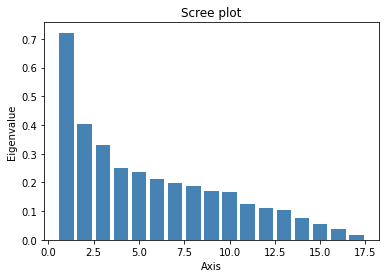

In [ ]:
ACM.plot_eigenvalues()

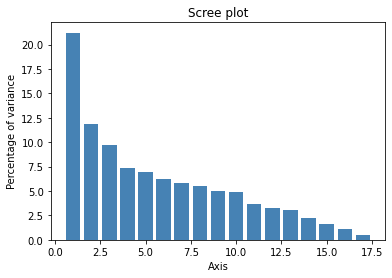

In [ ]:
ACM.plot_eigenvalues(type="percentage")

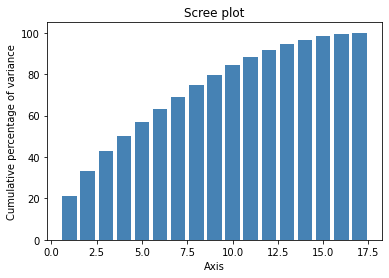

In [ ]:
ACM.plot_eigenvalues(type="cumulative")

In [ ]:
print("La moyenne des valeurs propres : ", np.average(ACM.eig_[0]))
print("La moyenne des valeurs propres est aussi égale à 1/p : ", 1/5)
print("On peut retenir les dimensions qui possèdent une valeur propre supérieure à la moyenne des valeurs propres. On retient donc", sum(ACM.eig_[0]>1/5), "dimensions.")

La moyenne des valeurs propres :  0.20000000000000007
La moyenne des valeurs propres est aussi égale à 1/p :  0.2
On peut retenir les dimensions qui possèdent une valeur propre supérieure à la moyenne des valeurs propres. On retient donc 6 dimensions.


In [ ]:
# Formule de taux d’inertie corrigé (Benzecri 1979)
vp_corrigés = ((ACM.eig_[0]-1/5)*5/4)**2

In [ ]:
# Pourcentages d'inertie expliquée
100*(vp_corrigés[:6]/vp_corrigés[:6].sum())

array([8.14283186e+01, 1.23721866e+01, 4.96993512e+00, 8.06549101e-01,
       3.90031164e-01, 3.29794098e-02])

In [ ]:
sum(100*(vp_corrigés[:6]/vp_corrigés[:6].sum()))

99.99999999999999

In [ ]:
# Instanciation
ACM6 = MCA(row_labels=df.index.values, var_labels=df.columns.values,n_components=6)
# Calcul
ACM6.fit(X)

MCA(n_components=6,
    row_labels=array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 1...
       313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325,
       326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338,
       339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351,
       352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364,
       365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377,
       378, 

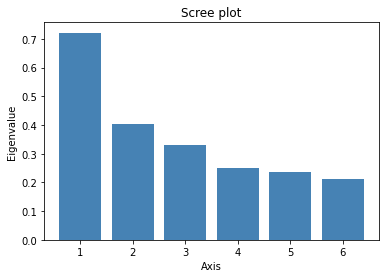

In [ ]:
# Représentation des valeurs propres
ACM6.plot_eigenvalues()

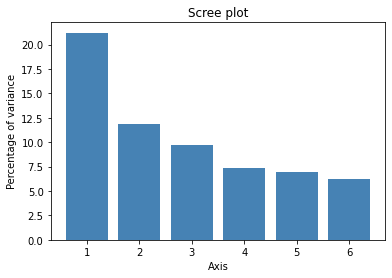

In [ ]:
# Représentation des valeurs propres en poucentage d'inertie
ACM6.plot_eigenvalues(type="percentage")

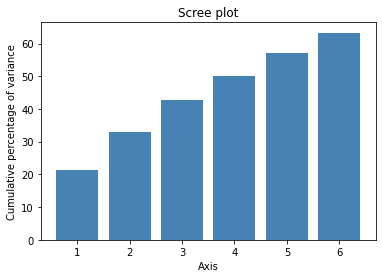

In [ ]:
# Représentation des valeurs propres en pourcentage d'inertie cumulé
ACM6.plot_eigenvalues(type="cumulative")

In [ ]:
# Exportation de la totalité des données lignes vers un DataFrame
df_rows = ACM6.row_topandas()
df_rows

,row_coord_dim1,row_coord_dim2,row_coord_dim3,row_coord_dim4,row_coord_dim5,row_coord_dim6,row_contrib_dim1,row_contrib_dim2,row_contrib_dim3,row_contrib_dim4,row_contrib_dim5,row_contrib_dim6,row_cos2_dim1,row_cos2_dim2,row_cos2_dim3,row_cos2_dim4,row_cos2_dim5,row_cos2_dim6
1,-1.493799,0.007911,-0.049346,-0.163453,0.408963,0.231824,0.807482,0.000041,0.001933,0.027692,0.184962,0.066662,0.752038,0.000021,0.000821,0.009004,0.056367,0.018112
2,-1.529649,-0.425435,0.178491,-0.091262,0.302214,-0.274512,0.846705,0.117180,0.025295,0.008633,0.101005,0.093472,0.559037,0.043244,0.007612,0.001990,0.021821,0.018004
3,-1.865093,-0.500662,0.280889,-0.324673,-0.083536,-0.077724,1.258778,0.162284,0.062644,0.109259,0.007717,0.007493,0.748871,0.053963,0.016985,0.022693,0.001502,0.001301
4,-1.865093,-0.500662,0.280889,-0.324673,-0.083536,-0.077724,1.258778,0.162284,0.062644,0.109259,0.007717,0.007493,0.748871,0.053963,0.016985,0.022693,0.001502,0.001301
5,-1.865093,-0.500662,0.280889,-0.324673,-0.083536,-0.077724,1.258778,0.162284,0.062644,0.109259,0.007717,0.007493,0.748871,0.053963,0.016985,0.022693,0.001502,0.001301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,-0.284472,-0.201026,0.217113,0.317539,-0.306433,0.307605,0.029284,0.026163,0.037427,0.104510,0.103845,0.117367,0.028463,0.014214,0.016579,0.035464,0.033027,0.033280
380,-0.257295,0.672886,-0.344194,-0.015555,0.458510,-0.611134,0.023956,0.293135,0.094063,0.000251,0.232495,0.463266,0.020320,0.138977,0.036363,0.000074,0.064529,0.114639
381,-0.042455,-0.796109,-0.406274,-0.339250,-1.557135,-0.424445,0.000652,0.410327,0.131054,0.119291,2.681440,0.223460,0.000271,0.095429,0.024853,0.017329,0.365080,0.027125
382,-0.056545,0.140053,-0.404866,1.253375,-1.136515,0.056034,0.001157,0.012699,0.130147,1.628273,1.428454,0.003895,0.000552,0.003384,0.028279,0.271025,0.222843,0.000542


In [ ]:
# Coordonnées des points lignes
np.set_printoptions(suppress=True)
print(np.round(ACM6.row_coord_,3))

[[-1.494  0.008 -0.049 -0.163  0.409  0.232]
 [-1.53  -0.425  0.178 -0.091  0.302 -0.275]
 [-1.865 -0.501  0.281 -0.325 -0.084 -0.078]
 ...
 [-0.042 -0.796 -0.406 -0.339 -1.557 -0.424]
 [-0.057  0.14  -0.405  1.253 -1.137  0.056]
 [-1.391 -0.4    0.209 -0.065 -0.098 -0.599]]


In [ ]:
# Contributions des points lignes
print(np.round(ACM6.row_contrib_,3))

[[0.807 0.    0.002 0.028 0.185 0.067]
 [0.847 0.117 0.025 0.009 0.101 0.093]
 [1.259 0.162 0.063 0.109 0.008 0.007]
 ...
 [0.001 0.41  0.131 0.119 2.681 0.223]
 [0.001 0.013 0.13  1.628 1.428 0.004]
 [0.7   0.104 0.035 0.004 0.011 0.446]]


In [ ]:
# Qualité de représentation COS2 des points lignes
print(np.round(ACM6.row_cos2_,3))

[[0.752 0.    0.001 0.009 0.056 0.018]
 [0.559 0.043 0.008 0.002 0.022 0.018]
 [0.749 0.054 0.017 0.023 0.002 0.001]
 ...
 [0.    0.095 0.025 0.017 0.365 0.027]
 [0.001 0.003 0.028 0.271 0.223 0.001]
 [0.414 0.034 0.009 0.001 0.002 0.077]]


In [ ]:
# Exportation de la totalité des données colonnes vers un DataFrame pandas
df_cols = ACM6.col_topandas()
df_cols

,col_coord_dim1,col_coord_dim2,col_coord_dim3,col_coord_dim4,col_coord_dim5,col_coord_dim6,col_contrib_dim1,col_contrib_dim2,col_contrib_dim3,col_contrib_dim4,col_contrib_dim5,col_contrib_dim6,col_cos2_dim1,col_cos2_dim2,col_cos2_dim3,col_cos2_dim4,col_cos2_dim5,col_cos2_dim6
Mode_Coloc,0.227522,1.020055,-0.786938,1.169199,-0.501917,0.185446,0.198563,7.140659,5.211917,15.019254,2.953143,0.452169,0.008314,0.167113,0.099459,0.219553,0.040460,0.005523
Mode_Couple,0.221854,1.315454,-0.244849,-0.942000,-0.517732,-0.201024,0.178107,11.203065,0.476002,9.197433,2.964326,0.501250,0.007390,0.259823,0.009002,0.133238,0.040247,0.006068
Mode_NR1,-1.591385,-0.238838,0.099534,-0.076013,0.263066,0.084370,17.412140,0.701692,0.149455,0.113787,1.454114,0.167760,0.835375,0.018816,0.003268,0.001906,0.022828,0.002348
Mode_Seul,0.692055,-0.525114,0.240510,-0.041332,0.148632,-0.042122,6.412559,6.605313,1.699339,0.065514,0.903945,0.081430,0.447495,0.257640,0.054047,0.001596,0.020641,0.001658
Type_Appart,0.239038,1.043298,-0.358106,0.116644,-0.299756,0.151438,0.479700,16.348962,2.362227,0.327173,2.305364,0.659956,0.024824,0.472894,0.055715,0.005911,0.039038,0.009964
Type_Autre,-1.584990,-0.132189,0.013677,-0.234340,0.736486,0.093014,13.817988,0.171956,0.002257,0.865170,9.117752,0.163118,0.621911,0.004326,0.000046,0.013595,0.134278,0.002142
Type_Chamb,0.235812,-0.797643,-0.027961,1.081486,0.671669,1.685989,0.080489,1.647639,0.002483,4.849168,1.995659,14.103512,0.003064,0.035054,0.000043,0.064441,0.024856,0.156615
Type_Cite,0.750465,-1.439496,-1.909820,-0.673123,-0.079988,-0.276261,1.671180,11.000693,23.747045,3.850952,0.058021,0.776266,0.067518,0.248415,0.437263,0.054318,0.000767,0.009149
Type_NR2,-0.920720,-0.872471,0.394205,1.107137,-3.038056,-0.782643,1.349759,2.168403,0.542886,5.590114,44.911739,3.343011,0.051662,0.046389,0.009470,0.074700,0.562480,0.037329
Type_Studio,0.717606,-0.155645,1.024909,-0.130644,0.328539,-0.276026,4.025070,0.338775,18.015042,0.382119,2.578352,2.041325,0.202238,0.009514,0.412536,0.006703,0.042390,0.029922


In [ ]:
# Coordonnées des points colonnes
print(np.round(ACM6.col_coord_,3))

[[ 0.228  1.02  -0.787  1.169 -0.502  0.185]
 [ 0.222  1.315 -0.245 -0.942 -0.518 -0.201]
 [-1.591 -0.239  0.1   -0.076  0.263  0.084]
 [ 0.692 -0.525  0.241 -0.041  0.149 -0.042]
 [ 0.239  1.043 -0.358  0.117 -0.3    0.151]
 [-1.585 -0.132  0.014 -0.234  0.736  0.093]
 [ 0.236 -0.798 -0.028  1.081  0.672  1.686]
 [ 0.75  -1.439 -1.91  -0.673 -0.08  -0.276]
 [-0.921 -0.872  0.394  1.107 -3.038 -0.783]
 [ 0.718 -0.156  1.025 -0.131  0.329 -0.276]
 [-1.539 -0.258  0.082 -0.045  0.169  0.115]
 [ 0.474  0.06  -0.125  0.607  0.133 -1.081]
 [ 0.657 -0.596 -0.138  0.339  0.017  0.938]
 [ 0.484  0.611  0.135 -0.731 -0.279  0.149]
 [ 0.213  0.093 -0.179  0.367  0.451 -0.41 ]
 [ 0.652 -0.048  0.234 -0.49  -0.416  0.725]
 [-1.212 -0.145  0.114 -0.219 -0.486  0.041]
 [-1.994 -0.815  0.496 -0.241 -0.886 -0.512]
 [ 0.612 -0.753  0.544  0.985 -0.276  0.44 ]
 [ 0.669  0.165  0.896 -0.519  0.08  -0.313]
 [ 0.776 -1.596 -2.049 -0.967 -0.128 -0.339]
 [-0.417  0.799 -0.451  0.164  0.311  0.198]]


In [ ]:
# Contributions des points colonnes
print(np.round(ACM6.col_contrib_,3))

[[ 0.199  7.141  5.212 15.019  2.953  0.452]
 [ 0.178 11.203  0.476  9.197  2.964  0.501]
 [17.412  0.702  0.149  0.114  1.454  0.168]
 [ 6.413  6.605  1.699  0.066  0.904  0.081]
 [ 0.48  16.349  2.362  0.327  2.305  0.66 ]
 [13.818  0.172  0.002  0.865  9.118  0.163]
 [ 0.08   1.648  0.002  4.849  1.996 14.104]
 [ 1.671 11.001 23.747  3.851  0.058  0.776]
 [ 1.35   2.168  0.543  5.59  44.912  3.343]
 [ 4.025  0.339 18.015  0.382  2.578  2.041]
 [16.806  0.844  0.105  0.04   0.623  0.324]
 [ 1.547  0.045  0.236  7.252  0.374 27.561]
 [ 2.499  3.677  0.24   1.901  0.005 17.471]
 [ 1.864  5.317  0.318 12.17   1.89   0.603]
 [ 0.627  0.216  0.975  5.321  8.583  7.974]
 [ 3.171  0.03   0.893  5.135  3.934 13.435]
 [ 9.458  0.244  0.185  0.886  4.658  0.037]
 [10.07   3.013  1.365  0.42   6.071  2.28 ]
 [ 1.842  4.995  3.19  13.685  1.149  3.26 ]
 [ 3.076  0.335 12.105  5.304  0.136  2.313]
 [ 1.526 11.542 23.329  6.79   0.128  0.997]
 [ 1.887 12.414  4.851  0.835  3.208  1.455]]


In [ ]:
# Qualités de représentation COS2 des points colonnes
print(np.round(ACM6.col_cos2_,3))

[[0.008 0.167 0.099 0.22  0.04  0.006]
 [0.007 0.26  0.009 0.133 0.04  0.006]
 [0.835 0.019 0.003 0.002 0.023 0.002]
 [0.447 0.258 0.054 0.002 0.021 0.002]
 [0.025 0.473 0.056 0.006 0.039 0.01 ]
 [0.622 0.004 0.    0.014 0.134 0.002]
 [0.003 0.035 0.    0.064 0.025 0.157]
 [0.068 0.248 0.437 0.054 0.001 0.009]
 [0.052 0.046 0.009 0.075 0.562 0.037]
 [0.202 0.01  0.413 0.007 0.042 0.03 ]
 [0.815 0.023 0.002 0.001 0.01  0.005]
 [0.074 0.001 0.005 0.121 0.006 0.386]
 [0.114 0.094 0.005 0.03  0.    0.232]
 [0.094 0.15  0.007 0.215 0.031 0.009]
 [0.045 0.009 0.032 0.134 0.202 0.167]
 [0.157 0.001 0.02  0.088 0.064 0.193]
 [0.445 0.006 0.004 0.015 0.072 0.001]
 [0.4   0.067 0.025 0.006 0.079 0.026]
 [0.081 0.122 0.064 0.21  0.016 0.042]
 [0.148 0.009 0.265 0.089 0.002 0.032]
 [0.061 0.256 0.422 0.094 0.002 0.012]
 [0.112 0.411 0.131 0.017 0.062 0.025]]


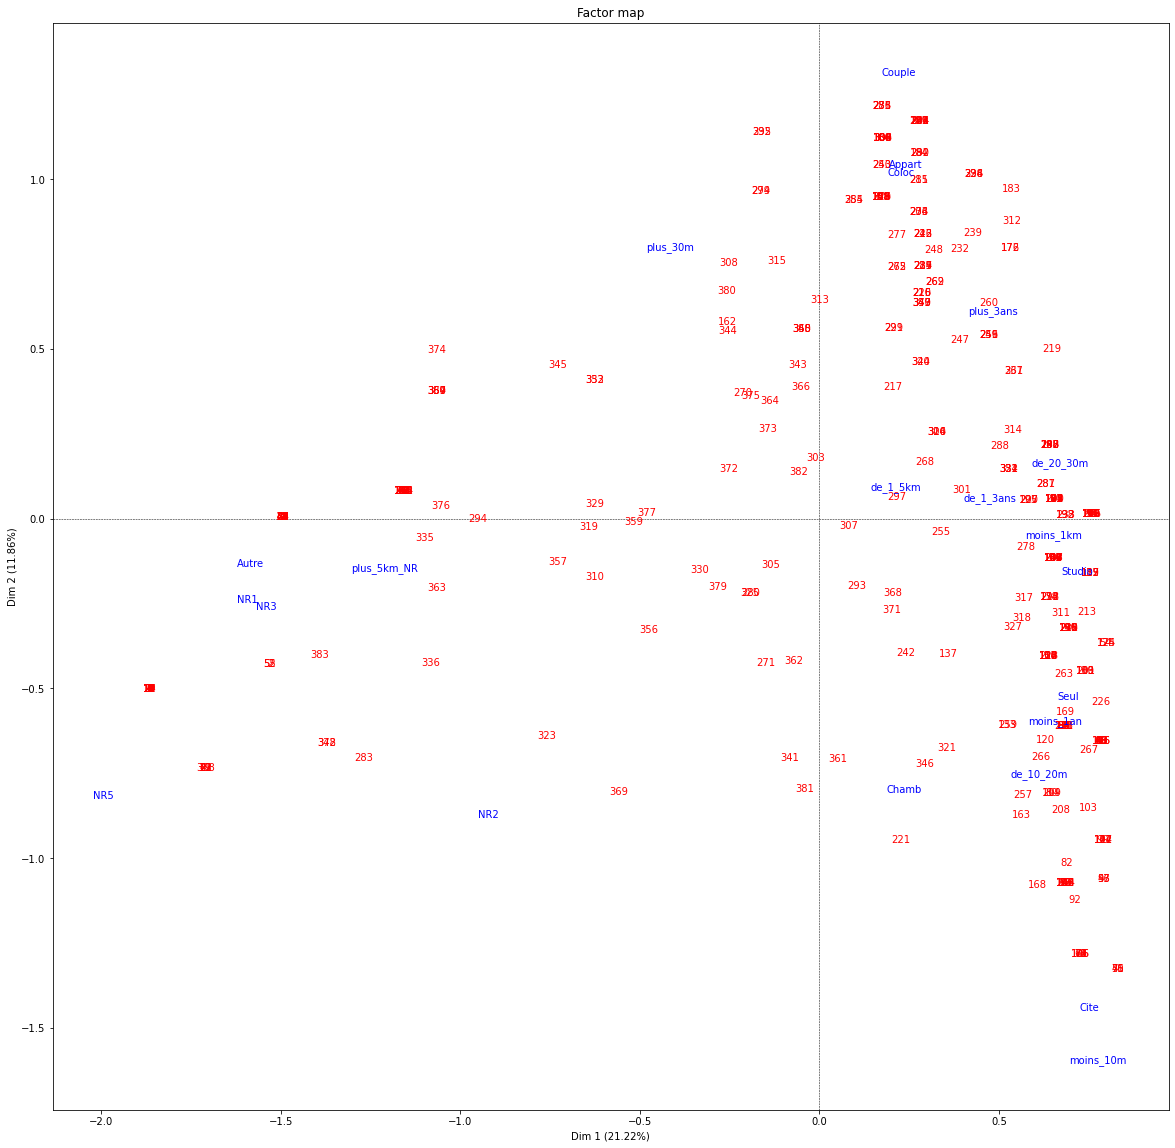

In [ ]:
# Représentation graphique simultanée des points lignes et colonnes
# Les paramètres de la méthode mapping indiquent que ce sont les axes 1 et 2 qui sont ici représentés
ACM6.mapping(num_x_axis=1, num_y_axis=2,figsize=(20,20))

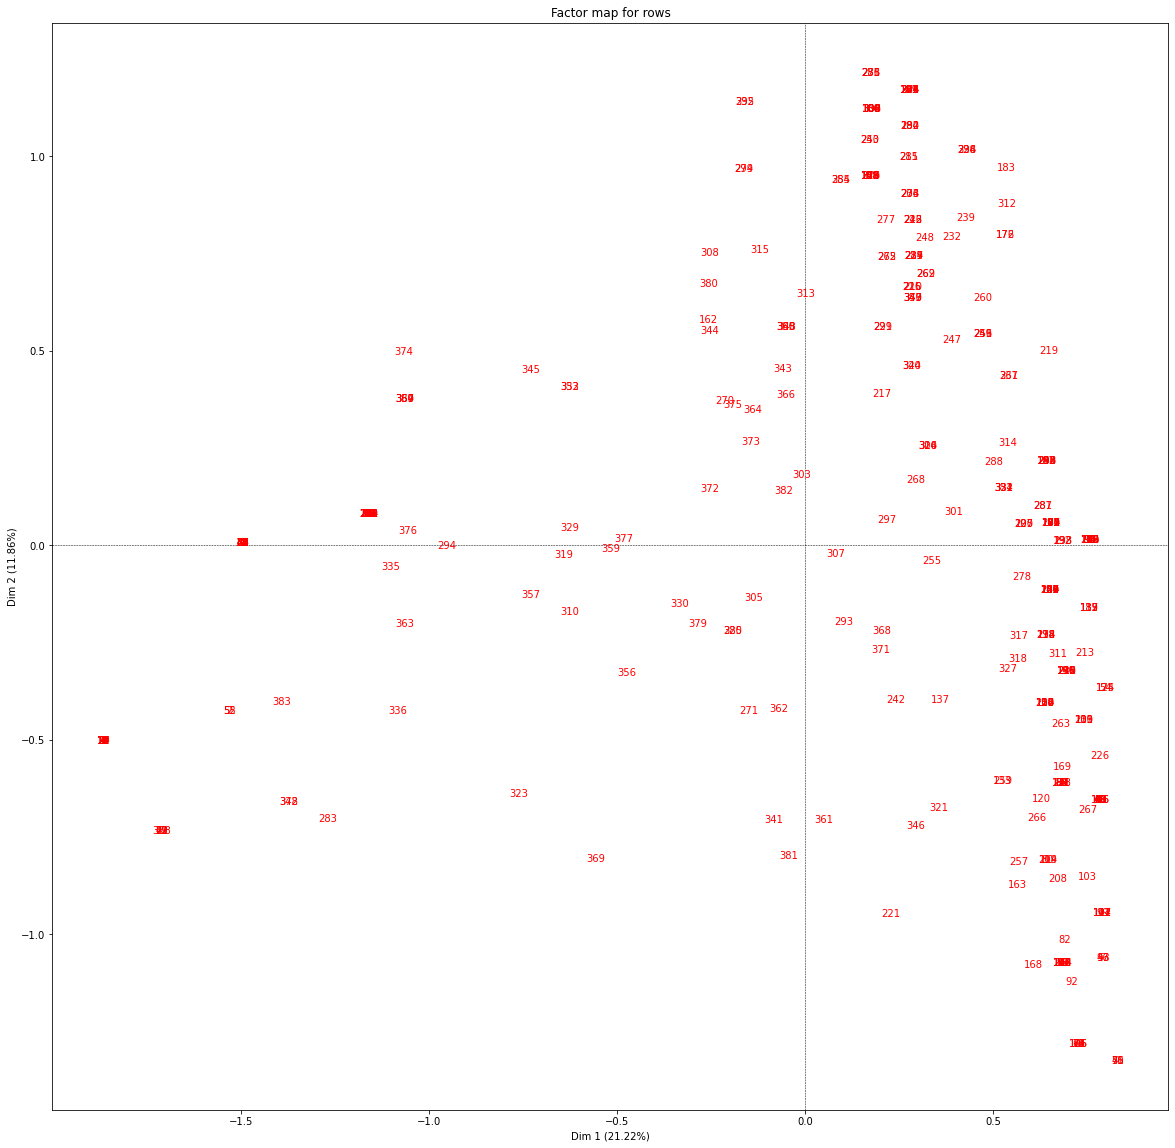

In [ ]:
# Représentation graphique des points lignes
ACM6.mapping_row(num_x_axis=1, num_y_axis=2,figsize=(20,20))

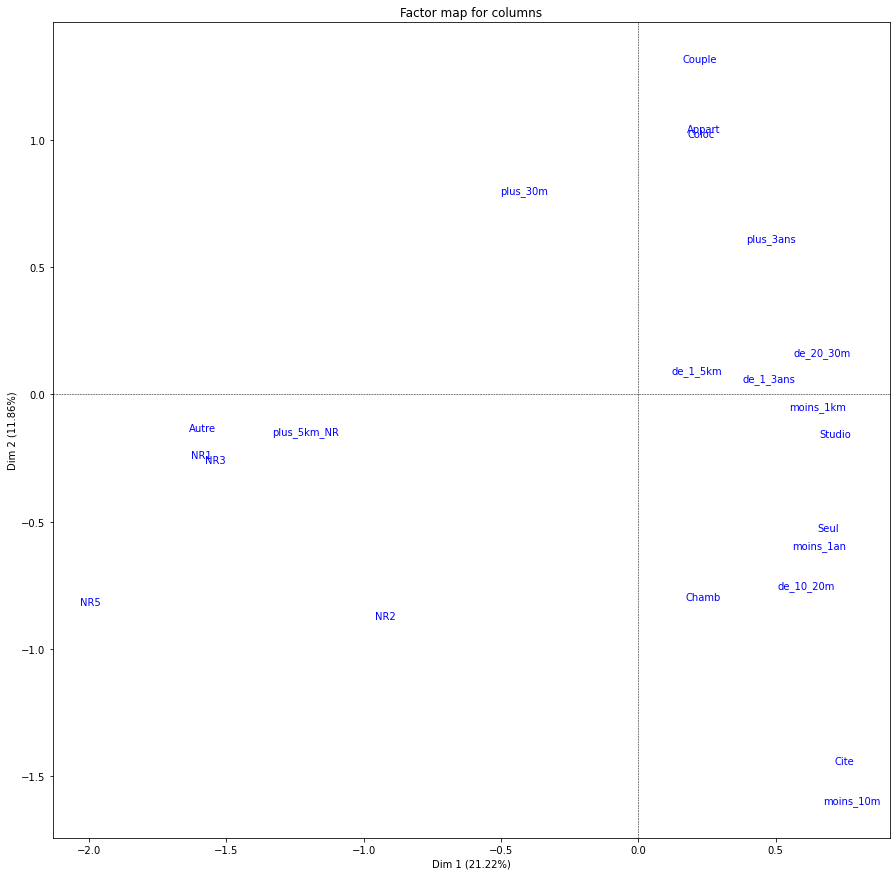

In [ ]:
# Représentation graphique des points colonnes
ACM6.mapping_col(num_x_axis=1, num_y_axis=2,figsize=(15,15))

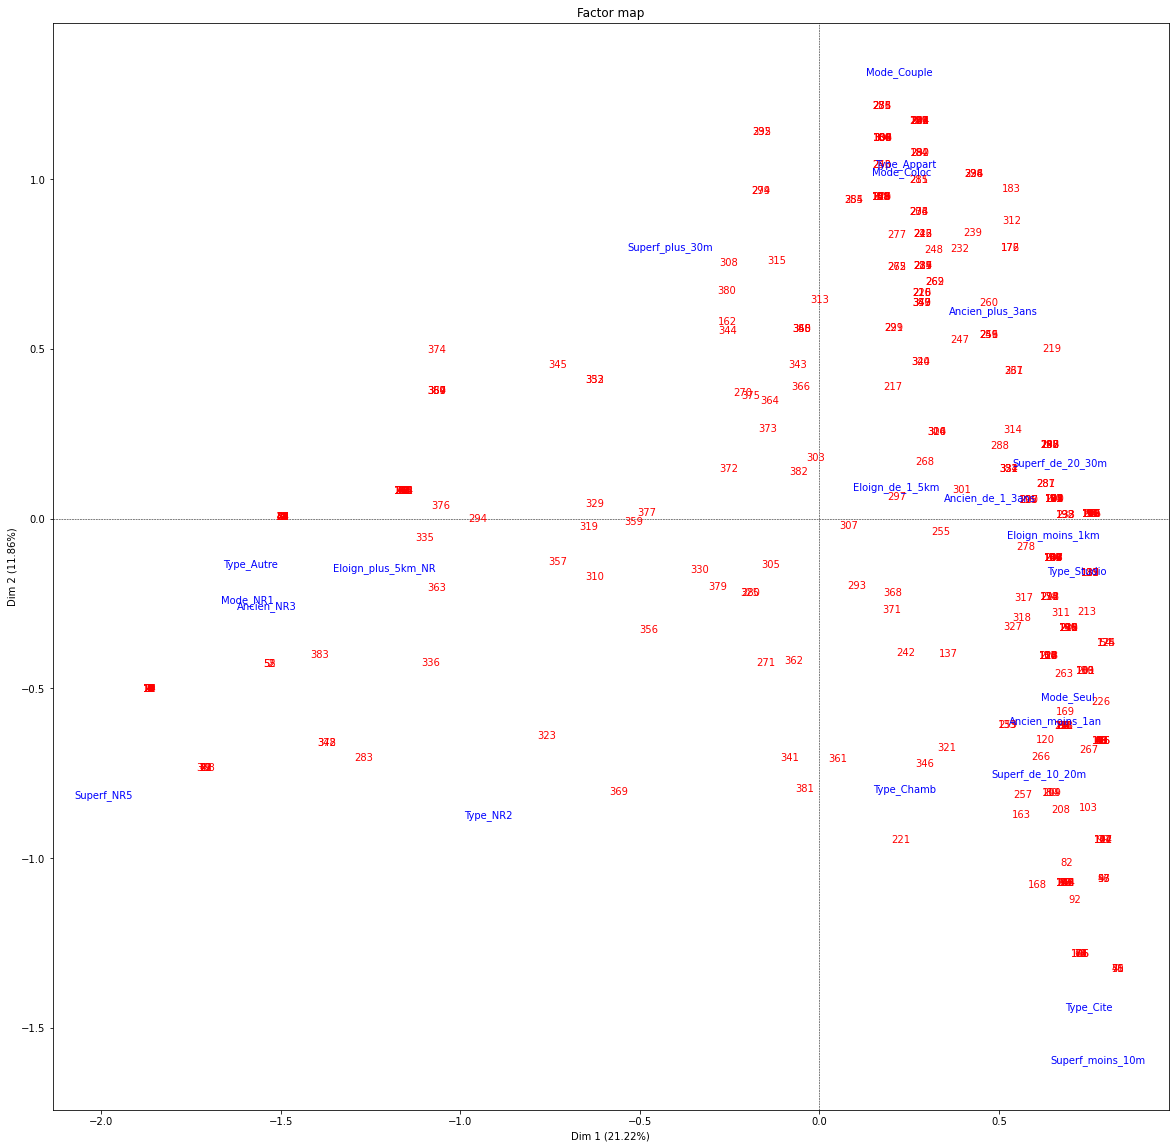

In [ ]:
ACM6.mapping(num_x_axis=1, num_y_axis=2, short_labels=False,figsize=(20,20))

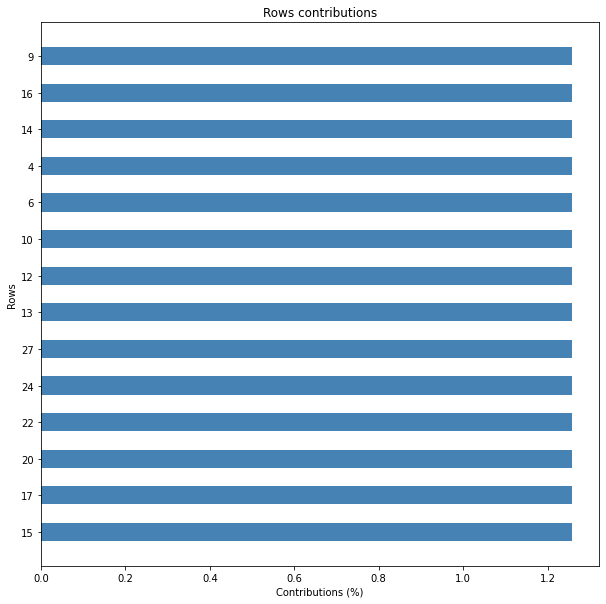

In [ ]:
# Classement des points lignes en fonction de leurs contributions au 1er axe
ACM6.plot_row_contrib(num_axis=1,figsize=(10,10),nb_values=14)

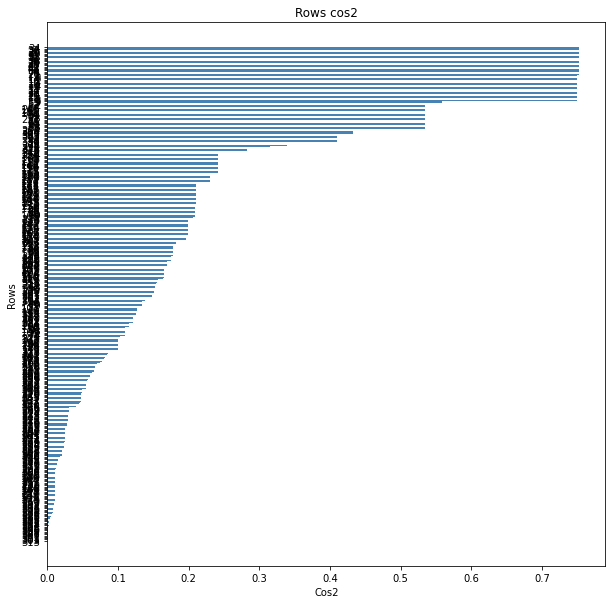

In [ ]:
# Classement des points lignes en fonction de leurs COS2 sur le 1er axe
ACM6.plot_row_cos2(num_axis=1,figsize=(10,10))

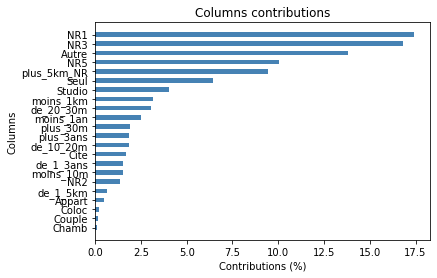

In [ ]:
# Classement des points colonnes en fonction de leurs contributions au 1er axe
ACM6.plot_col_contrib(num_axis=1)

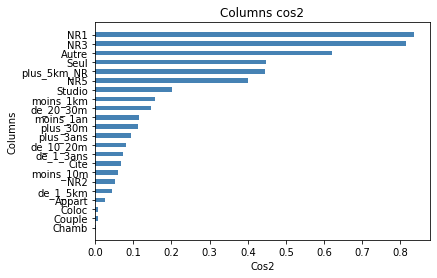

In [ ]:
# Classement des points colonnes en fonction de leurs COS2 sur le 1er axe
ACM6.plot_col_cos2(num_axis=1)

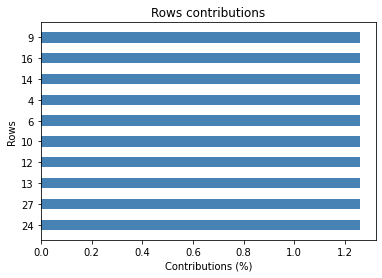

In [ ]:
# Exemple : on voudrait visualiser les 10 points lignes (race) qui contribuent le plus à la création de l'axe 1
ACM6.plot_row_contrib(num_axis=1, nb_values=10)

Les couples et les colco ont une apparent de plus de 30 ㎡ et ne vivent pas avec la famille depuis plus de 3 ans

Les seule vivent généralement en chambre ou studio à moins de 1 km et la taille de la maison est de 10 à 20, ne vivent pas avec la famille depuis moins de 1 ans

Personnes vivant à Cité dont la superficie de la maison est inférieure à 10 mètres carrés

Dans d'autres cas vivant à plus 5 km